<a href="https://colab.research.google.com/github/enggrobin/PythonProjects/blob/master/DeepLearning_Keras_API_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving lending_club_info.csv to lending_club_info.csv
User uploaded file "lending_club_info.csv" with length 2432 bytes


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("lending_club_loan_two1.csv")

In [70]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,15-Jan,Fully Paid,vacation,Vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,15-Jan,Fully Paid,debt_consolidation,Debt consolidation,22.05,4-Jul,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,15-Jan,Fully Paid,credit_card,Credit card refinancing,12.79,7-Aug,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,14-Nov,Fully Paid,credit_card,Credit card refinancing,2.60,6-Sep,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,13-Apr,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-99,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving lending_club_loan_two1.csv to lending_club_loan_two1.csv
User uploaded file "lending_club_loan_two1.csv" with length 23187883 bytes


In [0]:
dfinfo = pd.read_csv("lending_club_info.csv",index_col="LoanStatNew")

In [15]:
dfinfo.head(10)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [0]:
def get_desc(col_name):
  return dfinfo.loc[col_name]["Description"]

In [14]:
# Checking the main data :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99973 entries, 0 to 99972
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             99973 non-null  int64  
 1   term                  99973 non-null  object 
 2   int_rate              99973 non-null  float64
 3   installment           99973 non-null  float64
 4   grade                 99973 non-null  object 
 5   sub_grade             99973 non-null  object 
 6   emp_title             94261 non-null  object 
 7   emp_length            95388 non-null  object 
 8   home_ownership        99973 non-null  object 
 9   annual_inc            99973 non-null  float64
 10  verification_status   99973 non-null  object 
 11  issue_d               99973 non-null  object 
 12  loan_status           99973 non-null  object 
 13  purpose               99973 non-null  object 
 14  title                 99534 non-null  object 
 15  dti                

In [15]:
df["loan_status"].value_counts()

Fully Paid     80414
Charged Off    19559
Name: loan_status, dtype: int64

In [29]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,99973.000000,99973.000000,99973.000000,9.997300e+04,99973.000000,99973.000000,99973.000000,9.997300e+04,99901.000000,99973.000000,90520.000000,99850.000000
mean,14124.454853,13.642643,432.166506,7.422985e+04,17.323465,11.308523,0.178138,1.581462e+04,53.761313,25.438568,1.816195,0.121582
std,8380.101801,4.462393,251.575545,5.376582e+04,8.134671,5.125606,0.508545,1.959741e+04,24.406550,11.873149,2.144664,0.356640
min,500.000000,5.320000,16.250000,2.500000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.061000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.380000,6.400000e+04,16.860000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,568.770000,9.000000e+04,22.930000,14.000000,0.000000,1.963800e+04,72.800000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,6.100000e+06,189.900000,58.000000,19.000000,1.190046e+06,152.500000,135.000000,34.000000,7.000000


In [16]:
# Checking the missing values :
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               5712
emp_length              4585
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                    439
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                72
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                9453
pub_rec_bankruptcies     123
address                    0
dtype: int64

In [31]:
df.shape

(99973, 27)

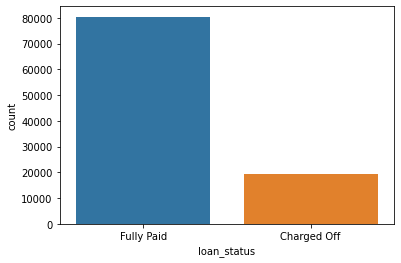

In [32]:
#Exploratory Data Analysis 

#Countplot of the Loan Status Column
sns.countplot(df["loan_status"])

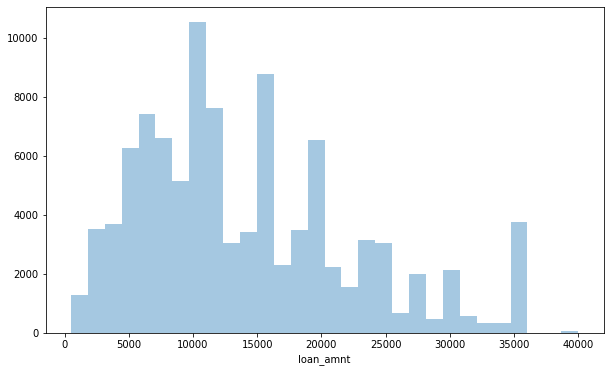

In [40]:
#Create a hitogram on the loan amount column
plt.figure(figsize=(10  ,6))
sns.distplot(df["loan_amnt"],bins = 30,kde=False)

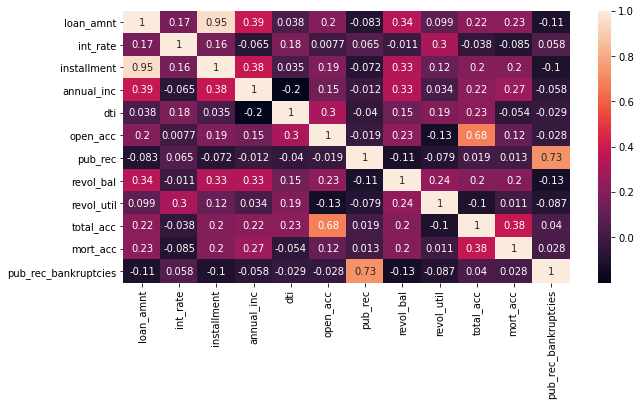

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

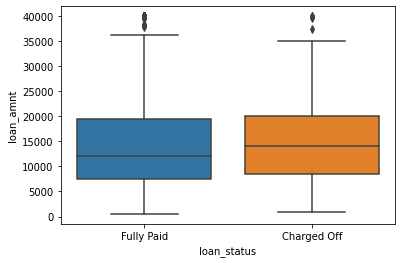

In [133]:
sns.boxplot(x=df["loan_status"],y=df["loan_amnt"])

In [51]:
# Unique possible grades and sub-grades of the loan:
df["grade"].unique()
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

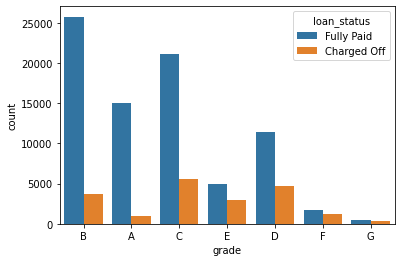

In [55]:
sns.countplot(x=df["grade"],hue=df["loan_status"])

In [0]:
df["loan_repaid"] = df["loan_status"].map({"Fully Paid" : 1,"Charged Off":0})

In [63]:
df[["loan_repaid","loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
99968,1,Fully Paid
99969,1,Fully Paid
99970,1,Fully Paid
99971,1,Fully Paid


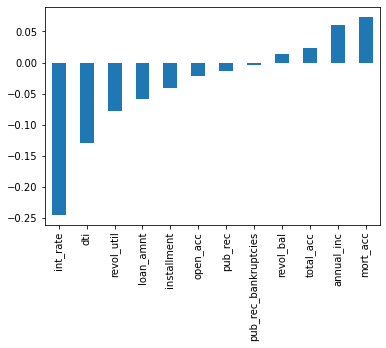

In [69]:
df.corr()["loan_repaid"].sort_values().drop("loan_repaid").plot(kind="bar")

In [72]:
df.shape

(99973, 28)

In [17]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.713543
emp_length              4.586238
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.439119
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.072019
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.455553
pub_rec_bankruptcies    0.123033
address                 0.000000
dtype: float64

In [18]:
get_desc("emp_title")

'The job title supplied by the Borrower when applying for the loan.*'

In [78]:
df["emp_title"].value_counts()

Teacher                             1122
Manager                             1102
Registered Nurse                     485
RN                                   467
Supervisor                           466
                                    ... 
Henri Bendel                           1
GMAC Financial Services                1
Transportation Reporting Manager       1
customer service / account rep         1
Blue Bird Bus Sales of Pgh.            1
Name: emp_title, Length: 53192, dtype: int64

In [0]:
df = df.drop("emp_title",axis = 1)

In [20]:
sorted(df["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

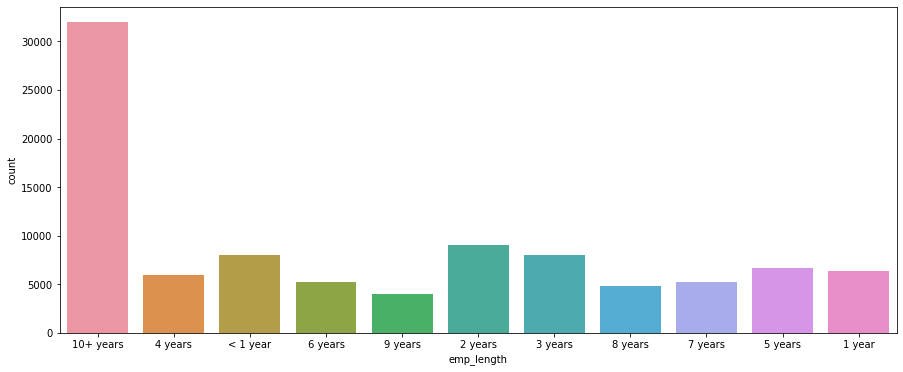

In [88]:
plt.figure(figsize=(15,6))
sns.countplot(df["emp_length"])

In [0]:
df = df.drop("emp_length",axis = 1)

In [22]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                    439
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                72
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                9453
pub_rec_bankruptcies     123
address                    0
dtype: int64

In [0]:
df = df.drop("title",axis = 1)

In [24]:
df["mort_acc"].value_counts()

0.0     35184
1.0     15299
2.0     12654
3.0      9723
4.0      7029
5.0      4542
6.0      2863
7.0      1506
8.0       791
9.0       401
10.0      236
11.0      119
12.0       64
13.0       33
14.0       29
15.0       14
16.0        9
17.0        5
24.0        4
22.0        3
19.0        3
20.0        2
18.0        2
25.0        2
34.0        1
21.0        1
32.0        1
Name: mort_acc, dtype: int64

In [76]:
df.corr()["mort_acc"].sort_values(ascending = False)

mort_acc                1.000000
total_acc               0.383576
annual_inc              0.268610
loan_amnt               0.225314
revol_bal               0.203292
installment             0.196854
open_acc                0.115303
loan_repaid             0.073225
pub_rec_bankruptcies    0.028201
pub_rec                 0.013308
revol_util              0.011089
dti                    -0.053526
int_rate               -0.084715
Name: mort_acc, dtype: float64

In [0]:
# fill the mort_acc column based on the total_acc column:

total_avg = df.groupby("total_acc").mean()["mort_acc"]
#df["total_acc"]

In [0]:
def fill_val(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return total_avg[total_acc]
  else:
    return mort_acc

In [0]:
df["mort_acc"] = df.apply(lambda x: fill_val(x["total_acc"],x["mort_acc"]),axis =1)

In [80]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               72
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    123
address                   0
loan_repaid               0
dtype: int64

In [33]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,15-Jan,Fully Paid,vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,15-Jan,Fully Paid,debt_consolidation,22.05,4-Jul,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,15-Jan,Fully Paid,credit_card,12.79,7-Aug,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,14-Nov,Fully Paid,credit_card,2.60,6-Sep,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,13-Apr,Charged Off,credit_card,33.95,Mar-99,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [36]:
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [38]:
df["term"].value_counts()

 36 months    76193
 60 months    23780
Name: term, dtype: int64

In [0]:
def get_num():
  for item in df["term"]:
    return int(item[:3])

In [0]:
df["term"]  = df["term"].apply(lambda x: int(x[:3]))

In [0]:
df = df.drop("grade",axis = 1)

In [83]:
df.shape

(99973, 24)

In [0]:
dummy = pd.get_dummies(df["sub_grade"],drop_first=True)     

In [0]:
#df = df.drop("sub_grade",axis = 1)
df = pd.concat([df.drop("sub_grade",axis = 1),dummy],axis =1)

In [0]:
#dummy = pd.get_dummies(df["sub_grade"],drop_first=True)     

In [0]:
#df["verification_status"].value_counts()
dummy_new = pd.get_dummies(df[["verification_status","initial_list_status", "application_type","purpose"]],drop_first=True)   
df = pd.concat([df.drop(["verification_status",'initial_list_status', 'application_type',"purpose"],axis = 1),dummy_new],axis =1)

In [87]:
df.shape

(99973, 71)

In [0]:
df["home_ownership"]  = df["home_ownership"].replace(["NONE","ANY"],"OTHER")

In [83]:
df["home_ownership"].value_counts()

MORTGAGE    50144
RENT        40330
OWN          9463
OTHER          36
Name: home_ownership, dtype: int64

In [0]:
dummy_home = pd.get_dummies(df["home_ownership"],drop_first=True) 
    

In [0]:
df = df.drop(["home_ownership"],axis = 1)
df = pd.concat([df,dummy_home],axis =1)

In [86]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000,36,11.44,329.48,117000.0,15-Jan,Fully Paid,26.24,Jun-90,16,0,36369,41.8,25,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,8000,36,11.99,265.68,65000.0,15-Jan,Fully Paid,22.05,4-Jul,17,0,20131,53.3,27,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,43057.0,15-Jan,Fully Paid,12.79,7-Aug,13,0,11987,92.2,26,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7200,36,6.49,220.65,54000.0,14-Nov,Fully Paid,2.60,6-Sep,6,0,5472,21.5,13,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,24375,60,17.27,609.33,55000.0,13-Apr,Charged Off,33.95,Mar-99,13,0,24584,69.8,43,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
df["address"].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [0]:
df["zip_code"]  = df["address"].head().apply(lambda x : x[-5:])

In [0]:
dummy_zip = pd.get_dummies(df["zip_code"],drop_first=True) 
df = df.drop(["address","zip_code"],axis = 1)
df = pd.concat([df,dummy_zip],axis =1)

In [0]:
df = df.drop("issue_d",axis =1 )

In [33]:
df["earliest_cr_line"]

0        Jun-90
1         4-Jul
2         7-Aug
3         6-Sep
4        Mar-99
          ...  
99968    Nov-98
99969    Oct-93
99970     1-Mar
99971    Jun-00
99972    May-79
Name: earliest_cr_line, Length: 99973, dtype: object

In [0]:
df = df.drop("earliest_cr_line",axis = 1)

In [101]:
df.shape

(99973, 72)

In [42]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,...,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,loan_repaid
0,10000,36,11.44,329.48,117000.0,Fully Paid,26.24,16,0,36369,41.8,25,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
1,8000,36,11.99,265.68,65000.0,Fully Paid,22.05,17,0,20131,53.3,27,3.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,15600,36,10.49,506.97,43057.0,Fully Paid,12.79,13,0,11987,92.2,26,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
3,7200,36,6.49,220.65,54000.0,Fully Paid,2.60,6,0,5472,21.5,13,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,24375,60,17.27,609.33,55000.0,Charged Off,33.95,13,0,24584,69.8,43,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
df  = df.drop("loan_status",axis =1 )

In [0]:
# Set X and Y values :

X = df.drop("loan_repaid",axis = 1).values
Y = df["loan_repaid"].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [118]:
len(y_test)

19995

In [119]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690
0,10000,36,11.44,329.48,117000.0,26.24,16,0,36369,41.8,25,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,8000,36,11.99,265.68,65000.0,22.05,17,0,20131,53.3,27,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,15600,36,10.49,506.97,43057.0,12.79,13,0,11987,92.2,26,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,7200,36,6.49,220.65,54000.0,2.60,6,0,5472,21.5,13,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,24375,60,17.27,609.33,55000.0,33.95,13,0,24584,69.8,43,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
#Normalizing the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train  = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 

In [0]:
# Creating the model :
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# input layer
model.add(Dense(72,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(36, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')


In [114]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
313/313 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/25
313/313 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/25
313/313 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/25
313/313 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/25
313/313 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/25
313/313 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/25
313/313 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/25
313/313 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/25
313/313 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 10/25
313/313 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/25
313/313 [==============================] - 1s 3